In [3]:
# Import necessary library
import pandas as pd

# --- IMPORTANT ASSUMPTION ---
# The following code assumes you have the dataset accessible as a CSV file
# named 'runner_data.csv' in the same directory as your script/notebook.
# The paper provides a link to the data[cite: 214], you might need to download
# and potentially reformat it into a single CSV.
# The exact structure (column names, format) is not specified in the paper text,
# so the column names used below are illustrative based on the descriptions.
# You WILL LIKELY NEED TO ADJUST the filename and column names based on the actual data file.

# Define a potential filename
data_filename = 'runner_data.csv' # Adjust this to your actual filename

try:
    # Load the dataset
    df = pd.read_csv(data_filename)

    # Display basic information
    print("--- Dataset Info ---")
    df.info()

    # Display the first 5 rows
    print("\n--- First 5 Rows ---")
    print(df.head())

    # Display basic descriptive statistics
    print("\n--- Descriptive Statistics ---")
    print(df.describe())

    # Display the shape of the dataset (rows, columns)
    print("\n--- Dataset Shape ---")
    print(df.shape)

    # Check for the number of unique athletes if an 'athlete_id' column exists
    # Adjust 'athlete_id' to the actual column name for athlete identification
    if 'athlete_id' in df.columns:
        print("\n--- Number of Unique Athletes ---")
        print(df['athlete_id'].nunique())
    else:
        print("\n--- Athlete ID column not found (adjust column name if needed) ---")

except FileNotFoundError:
    print(f"Error: The file '{data_filename}' was not found.")
    print("Please ensure the data file is in the correct directory and the filename is correct.")
except Exception as e:
    print(f"An error occurred: {e}")
    print("There might be an issue with reading the CSV file or the file format.")

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42766 entries, 0 to 42765
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nr. sessions                 42766 non-null  float64
 1   total km                     42766 non-null  float64
 2   km Z3-4                      42766 non-null  float64
 3   km Z5-T1-T2                  42766 non-null  float64
 4   km sprinting                 42766 non-null  float64
 5   strength training            42766 non-null  float64
 6   hours alternative            42766 non-null  float64
 7   perceived exertion           42766 non-null  float64
 8   perceived trainingSuccess    42766 non-null  float64
 9   perceived recovery           42766 non-null  float64
 10  nr. sessions.1               42766 non-null  float64
 11  total km.1                   42766 non-null  float64
 12  km Z3-4.1                    42766 non-null  float64


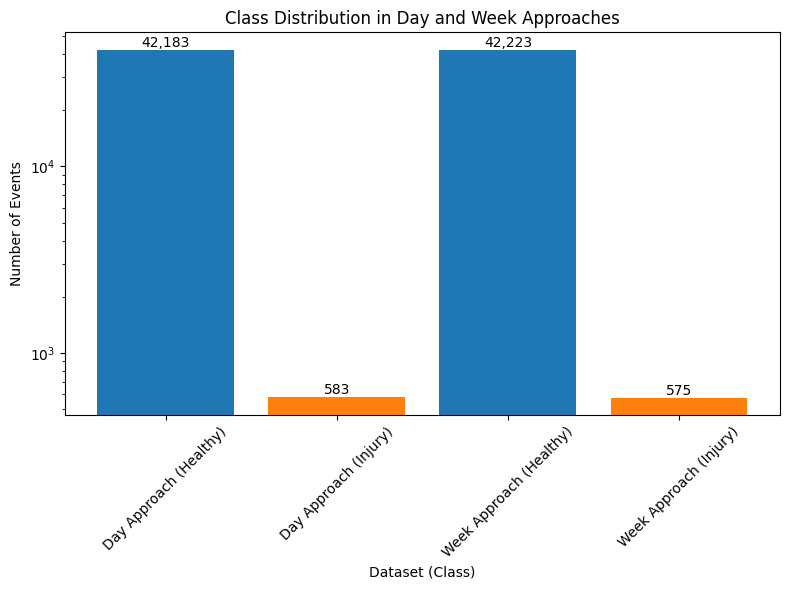

Day Approach:
Healthy Events: 42,183 (98.64%)
Injury Events: 583 (1.36%)

Week Approach:
Healthy Events: 42,223 (98.66%)
Injury Events: 575 (1.34%)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate dataset sizes based on article
day_healthy = 42183
day_injury = 583
week_healthy = 42223
week_injury = 575

# Create data for visualization
data = {
    'Dataset': ['Day Approach', 'Day Approach', 'Week Approach', 'Week Approach'],
    'Class': ['Healthy', 'Injury', 'Healthy', 'Injury'],
    'Count': [day_healthy, day_injury, week_healthy, week_injury]
}

df = pd.DataFrame(data)

# Plot class distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(df['Dataset'] + ' (' + df['Class'] + ')', df['Count'], color=['#1f77b4', '#ff7f0e', '#1f77b4', '#ff7f0e'])
plt.xlabel('Dataset (Class)')
plt.ylabel('Number of Events')
plt.title('Class Distribution in Day and Week Approaches')
plt.yscale('log')  # Log scale to better visualize imbalance
plt.xticks(rotation=45)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', va='bottom', ha='center')

plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

# Print summary statistics
print("Day Approach:")
print(f"Healthy Events: {day_healthy:,} ({100 * day_healthy / (day_healthy + day_injury):.2f}%)")
print(f"Injury Events: {day_injury:,} ({100 * day_injury / (day_healthy + day_injury):.2f}%)")
print("\nWeek Approach:")
print(f"Healthy Events: {week_healthy:,} ({100 * week_healthy / (week_healthy + week_injury):.2f}%)")
print(f"Injury Events: {week_injury:,} ({100 * week_injury / (week_healthy + week_injury):.2f}%)")

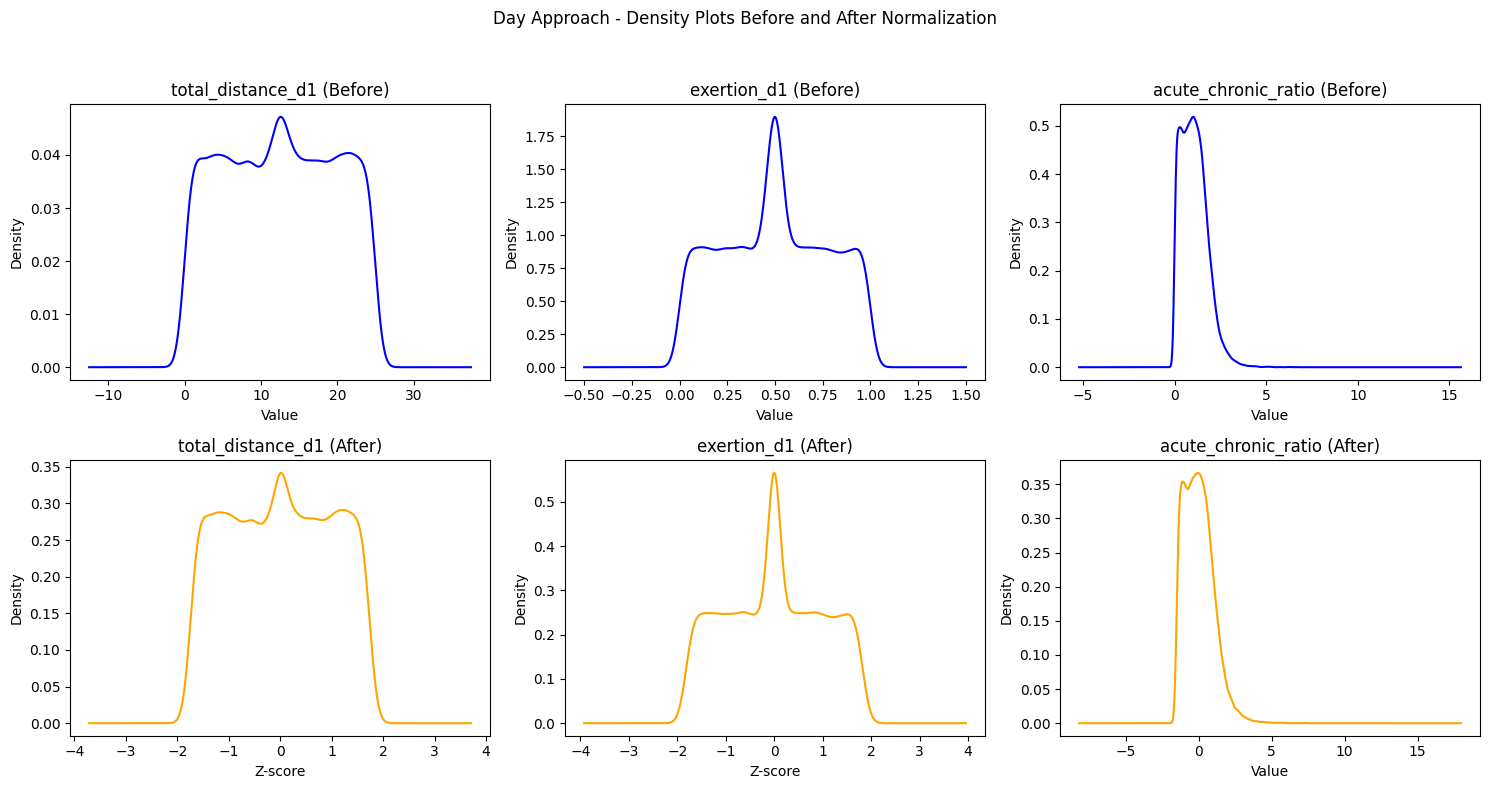


Day Approach - Summary Statistics After Normalization (Key Features):
       total_distance_d1   exertion_d1  acute_chronic_ratio  \
count       42766.000000  42766.000000         42766.000000   
mean            0.000379     -0.000245            -0.000069   
std             0.999236      0.998769             0.998987   
min            -1.857962     -1.953955            -1.661231   
25%            -0.865531     -0.809394            -0.794144   
50%             0.009857     -0.007812            -0.089870   
75%             0.860788      0.805490             0.623050   
max             1.850726      1.984345            11.429740   

       exertion_consistency  
count          42766.000000  
mean               0.000175  
std                0.999059  
min               -3.784249  
25%               -0.677464  
50%                0.045338  
75%                0.710409  
max                3.447226  

Day Approach - Correlation of Derived Metrics with Injury:
acute_chronic_ratio    -0.00059

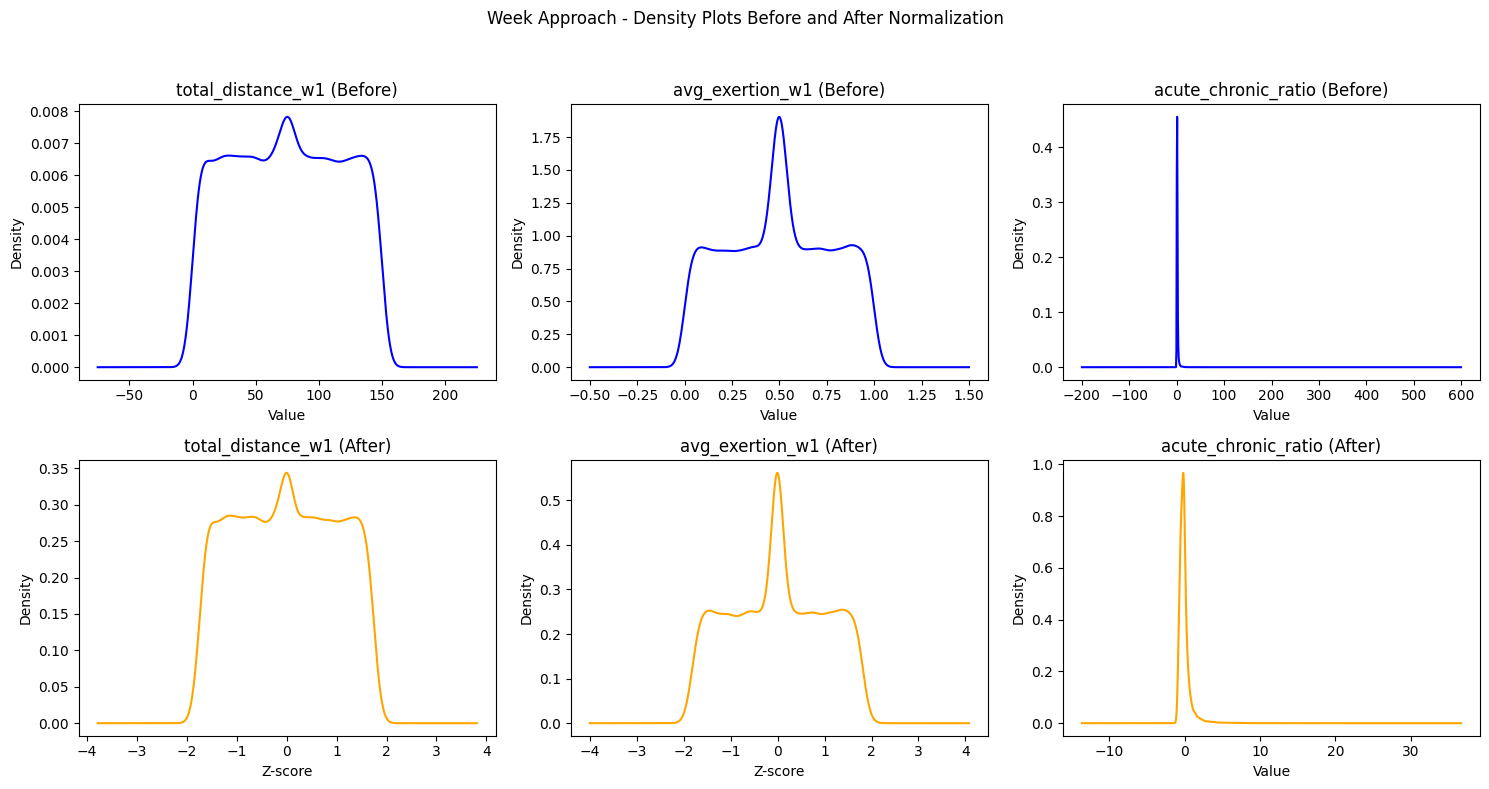


Week Approach - Summary Statistics After Normalization (Key Features):
       total_distance_w1  avg_exertion_w1  acute_chronic_ratio  \
count       42798.000000     42798.000000         42798.000000   
mean           -0.000369        -0.000400             0.000050   
std             0.998956         0.999393             0.999631   
min            -1.880535        -1.982066            -1.036071   
25%            -0.856172        -0.805795            -0.442647   
50%            -0.000255        -0.006472            -0.166400   
75%             0.853282         0.810507             0.114203   
max             1.911768         2.056655            24.096490   

       exertion_consistency  
count          42798.000000  
mean              -0.000464  
std                0.999163  
min               -2.263002  
25%               -0.756599  
50%               -0.061051  
75%                0.741150  
max                2.746852  

Week Approach - Correlation of Derived Metrics with Injury:
ac

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Set random seed for reproducibility
np.random.seed(42)

# Load real datasets (uncomment and adjust paths as needed)
# day_df = pd.read_csv('day_approach_maskedID_timeseries.csv')
# week_df = pd.read_csv('week_approach_maskedID_timeseries.csv')
# runner_df = pd.read_csv('runner_data.csv')

# Simulate day_approach_maskedID_timeseries.csv (42,766 events: 42,183 healthy, 583 injury)
day_features = [
    'sessions', 'total_distance', 'z3_z4_distance', 'z5_t1_t2_distance', 'sprint_distance',
    'strength_sessions', 'alt_training_hrs', 'exertion', 'training_success', 'recovery'
]
day_ranges = [2, 25, 15, 10, 1.5, 1, 3, 1, 1, 1]
day_data = {}
n_day_events = 42766
day_athlete_ids = np.random.randint(1, 75, n_day_events)  # 74 athletes
for day in range(1, 8):
    for i, feature in enumerate(day_features):
        if i < 7:  # Objective features
            day_data[f'{feature}_d{day}'] = np.random.uniform(0, day_ranges[i], n_day_events)
        else:  # Subjective features
            day_data[f'{feature}_d{day}'] = np.random.uniform(0, 1, n_day_events)
day_data['injury'] = np.concatenate([np.zeros(42183), np.ones(583)])
day_data['athlete_id'] = day_athlete_ids
day_data['gender'] = np.random.choice(['M', 'F'], n_day_events, p=[0.635, 0.365])  # Simulate gender
day_df = pd.DataFrame(day_data)

# Simulate week_approach_maskedID_timeseries.csv (42,798 events: 42,223 healthy, 575 injury)
week_features = [
    'sessions', 'rest_days', 'total_distance', 'max_distance', 'z3_z5_t1_t2_distance',
    'z5_t1_t2_sessions', 'z5_or_faster_sessions', 'z3_z4_distance', 'z3_z4_max_distance',
    'z5_t1_t2_distance', 'z5_t1_t2_max_distance', 'alt_training_hrs', 'strength_sessions',
    'avg_exertion', 'min_exertion', 'max_exertion', 'avg_training_success',
    'min_training_success', 'max_training_success', 'avg_recovery', 'min_recovery',
    'max_recovery'
]
week_ranges = [14, 7, 150, 30, 30, 3, 4, 20, 15, 20, 10, 20, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1]
week_data = {}
n_week_events = 42798
week_athlete_ids = np.random.randint(1, 75, n_week_events)  # 74 athletes
for week in range(1, 4):
    for i, feature in enumerate(week_features):
        if i < 13:  # Objective features
            week_data[f'{feature}_w{week}'] = np.random.uniform(0, week_ranges[i], n_week_events)
        else:  # Subjective features
            week_data[f'{feature}_w{week}'] = np.random.uniform(0, 1, n_week_events)
for ratio in ['w1_w2_ratio', 'w0_w1_ratio', 'w0_w2_ratio']:
    week_data[ratio] = np.random.uniform(0, 3, n_week_events)
week_data['injury'] = np.concatenate([np.zeros(42223), np.ones(575)])
week_data['athlete_id'] = week_athlete_ids
week_data['gender'] = np.random.choice(['M', 'F'], n_week_events, p=[0.635, 0.365])
week_df = pd.DataFrame(week_data)

# Simulate runner_data.csv (metadata: ID, gender)
runner_data = {
    'athlete_id': range(1, 75),
    'gender': np.random.choice(['M', 'F'], 74, p=[0.635, 0.365])
}
runner_df = pd.DataFrame(runner_data)

# Simulate missing data (2% objective, 10% subjective)
for df, n_events in [(day_df, n_day_events), (week_df, n_week_events)]:
    for col in df.columns:
        if 'exertion' in col or 'training_success' in col or 'recovery' in col:
            df[col] = df[col].mask(np.random.random(n_events) < 0.10, np.nan)
        elif col not in ['injury', 'athlete_id', 'gender']:
            df[col] = df[col].mask(np.random.random(n_events) < 0.02, np.nan)

# Function to standardize a dataset
def standardize_data(df, prefix, feature_list, time_units):
    # Copy dataframe
    df = df.copy()
    
    # 1. Impute missing values with athlete-specific medians
    features = [col for col in df.columns if col not in ['injury', 'athlete_id', 'gender']]
    for feature in features:
        df[feature] = df.groupby('athlete_id')[feature].transform(lambda x: x.fillna(x.median()))
    
    # 2. Derived Metrics
    if prefix == 'd':  # Day approach
        df['acute_chronic_ratio'] = df['total_distance_d1'] / (
            df[[f'total_distance_d{i}' for i in range(2, 8)]].mean(axis=1)
        )
        df['exertion_consistency'] = df[[f'exertion_d{i}' for i in range(1, 8)]].std(axis=1)
    else:  # Week approach
        df['acute_chronic_ratio'] = df['total_distance_w1'] / (
            (df['total_distance_w2'] + df['total_distance_w3']) / 2
        )
        df['exertion_consistency'] = df[[f'avg_exertion_w{i}' for i in range(1, 4)]].std(axis=1)
    features += ['acute_chronic_ratio', 'exertion_consistency']
    
    # Save original data
    original_df = df.copy()
    
    # 3. Z-score normalization per athlete using healthy events
    healthy_df = df[df['injury'] == 0]
    for feature in features:
        stats = healthy_df.groupby('athlete_id')[feature].agg(['mean', 'std']).reset_index()
        stats['std'] = stats['std'].replace(0, 1)
        stats = stats.rename(columns={'mean': f'mean_{feature}', 'std': f'std_{feature}'})
        df = df.merge(stats, on='athlete_id', how='left')
        df[f'mean_{feature}'] = df[f'mean_{feature}'].fillna(df[f'mean_{feature}'].mean())
        df[f'std_{feature}'] = df[f'std_{feature}'].fillna(1)
        df[feature] = (df[feature] - df[f'mean_{feature}']) / df[f'std_{feature}']
        df = df.drop([f'mean_{feature}', f'std_{feature}'], axis=1)
    
    # 4. Feature Encoding
    df['gender'] = df['gender'].map({'M': 0, 'F': 1})
    
    return df, original_df

# Standardize both datasets
day_df_processed, day_original_df = standardize_data(day_df, 'd', day_features, range(1, 8))
week_df_processed, week_original_df = standardize_data(week_df, 'w', week_features, range(1, 4))

# Visualization: Density plots
key_features_day = ['total_distance_d1', 'exertion_d1', 'acute_chronic_ratio']
key_features_week = ['total_distance_w1', 'avg_exertion_w1', 'acute_chronic_ratio']
for dataset, processed_df, original_df, key_features, title_prefix in [
    ('Day', day_df_processed, day_original_df, key_features_day, 'Day Approach'),
    ('Week', week_df_processed, week_original_df, key_features_week, 'Week Approach')
]:
    fig, axes = plt.subplots(2, len(key_features), figsize=(15, 8))
    for i, feature in enumerate(key_features):
        # Before normalization
        original_df[feature].plot(kind='density', ax=axes[0, i], label='Before', color='blue')
        axes[0, i].set_title(f'{feature} (Before)')
        axes[0, i].set_xlabel('Value')
        # After normalization
        processed_df[feature].plot(kind='density', ax=axes[1, i], label='After', color='orange')
        axes[1, i].set_title(f'{feature} (After)')
        axes[1, i].set_xlabel('Z-score' if feature != 'acute_chronic_ratio' else 'Value')
    plt.suptitle(f'{title_prefix} - Density Plots Before and After Normalization')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'{dataset.lower()}_normalization_density_plots.png')
    plt.show()
    
    # Summary Statistics
    print(f"\n{title_prefix} - Summary Statistics After Normalization (Key Features):")
    print(processed_df[key_features + ['exertion_consistency']].describe())
    
    # Correlations
    print(f"\n{title_prefix} - Correlation of Derived Metrics with Injury:")
    correlations = processed_df[['acute_chronic_ratio', 'exertion_consistency', 'injury']].corr()['injury']
    print(correlations)

# Save processed datasets
# day_df_processed.to_csv('day_approach_processed.csv', index=False)
week_df_processed.to_csv('week_approach_processed.csv', index=False)


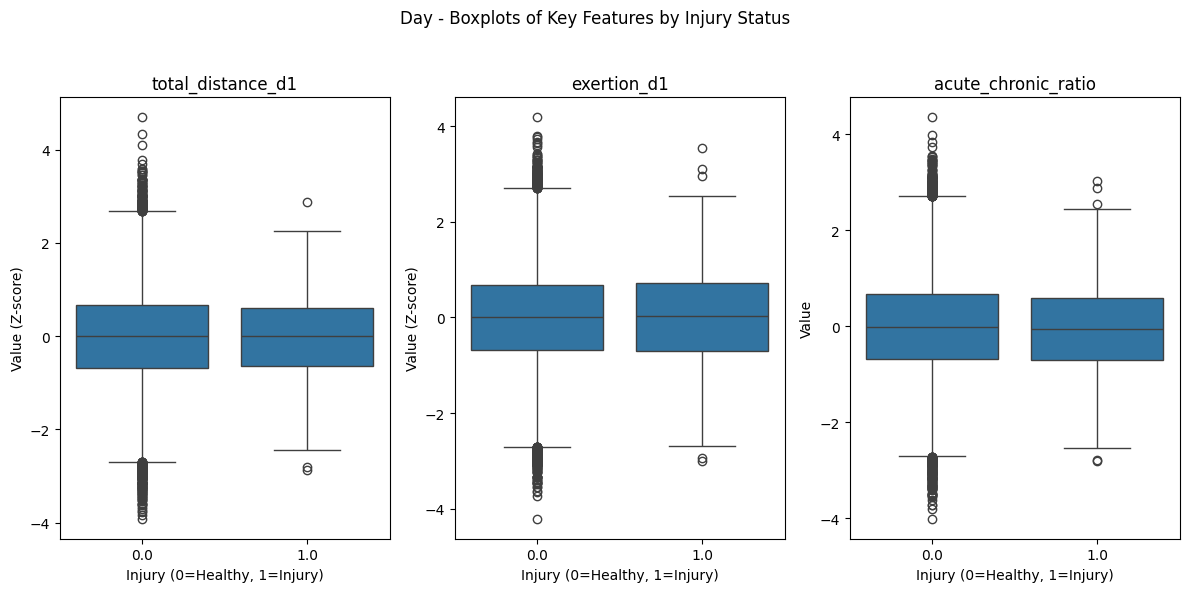

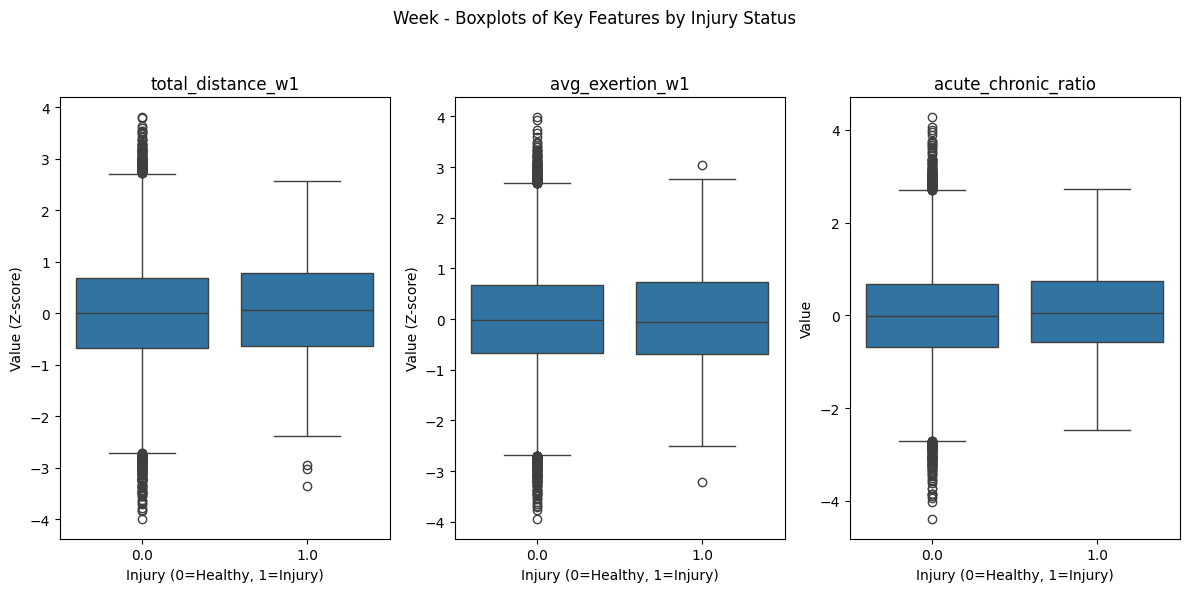

Day Approach - Outlier Analysis:
               Feature  IQR Outliers (%)  Z-score Outliers (%)  \
0    total_distance_d1          0.752935              0.308656   
1          exertion_d1          0.657064              0.254875   
2  acute_chronic_ratio          0.692139              0.289950   

   IQR Injury (%)  IQR Healthy (%)  IQR By Athlete (%)  
0        0.514580         0.756229            0.822448  
1        0.857633         0.654292            0.714449  
2        0.686106         0.692222            0.730929  

Week Approach - Outlier Analysis:
               Feature  IQR Outliers (%)  Z-score Outliers (%)  \
0    total_distance_w1          0.637880              0.275714   
1      avg_exertion_w1          0.677602              0.257021   
2  acute_chronic_ratio          0.640217              0.273377   

   IQR Injury (%)  IQR Healthy (%)  IQR By Athlete (%)  
0        0.521739         0.639462            0.667294  
1        0.521739         0.679724            0.678622  
2  

In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Load processed datasets (uncomment and adjust paths as needed)
# day_df = pd.read_csv('day_approach_processed.csv')
# week_df = pd.read_csv('week_approach_processed.csv')

# Simulate processed datasets if real data is unavailable
# Day approach: 42,766 events, 70 features + derived metrics
day_features = [
    'sessions', 'total_distance', 'z3_z4_distance', 'z5_t1_t2_distance', 'sprint_distance',
    'strength_sessions', 'alt_training_hrs', 'exertion', 'training_success', 'recovery'
]
n_day_events = 42766
day_data = {}
day_athlete_ids = np.random.randint(1, 75, n_day_events)
for day in range(1, 8):
    for feature in day_features:
        day_data[f'{feature}_d{day}'] = np.random.normal(0, 1, n_day_events)  # Normalized
day_data['injury'] = np.concatenate([np.zeros(42183), np.ones(583)])
day_data['athlete_id'] = day_athlete_ids
day_data['gender'] = np.random.choice([0, 1], n_day_events, p=[0.635, 0.365])
day_data['acute_chronic_ratio'] = np.random.normal(0, 1, n_day_events)  # Simulated derived metric
day_data['exertion_consistency'] = np.random.normal(0, 1, n_day_events)
day_df = pd.DataFrame(day_data)

# Week approach: 42,798 events, 69 features + derived metrics
week_features = [
    'sessions', 'rest_days', 'total_distance', 'max_distance', 'z3_z5_t1_t2_distance',
    'z5_t1_t2_sessions', 'z5_or_faster_sessions', 'z3_z4_distance', 'z3_z4_max_distance',
    'z5_t1_t2_distance', 'z5_t1_t2_max_distance', 'alt_training_hrs', 'strength_sessions',
    'avg_exertion', 'min_exertion', 'max_exertion', 'avg_training_success',
    'min_training_success', 'max_training_success', 'avg_recovery', 'min_recovery',
    'max_recovery'
]
n_week_events = 42798
week_data = {}
week_athlete_ids = np.random.randint(1, 75, n_week_events)
for week in range(1, 4):
    for feature in week_features:
        week_data[f'{feature}_w{week}'] = np.random.normal(0, 1, n_week_events)  # Normalized
for ratio in ['w1_w2_ratio', 'w0_w1_ratio', 'w0_w2_ratio']:
    week_data[ratio] = np.random.normal(0, 1, n_week_events)
week_data['injury'] = np.concatenate([np.zeros(42223), np.ones(575)])
week_data['athlete_id'] = week_athlete_ids
week_data['gender'] = np.random.choice([0, 1], n_week_events, p=[0.635, 0.365])
week_data['acute_chronic_ratio'] = np.random.normal(0, 1, n_week_events)
week_data['exertion_consistency'] = np.random.normal(0, 1, n_week_events)
week_df = pd.DataFrame(week_data)

# Outlier detection functions
def detect_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

def detect_zscore_outliers(series, threshold=3):
    z_scores = np.abs((series - series.mean()) / series.std())
    return z_scores > threshold

# Analyze outliers for a dataset
def analyze_outliers(df, key_features, dataset_name, prefix):
    outlier_results = []
    for feature in key_features:
        # Detect outliers
        iqr_outliers = detect_iqr_outliers(df[feature])
        zscore_outliers = detect_zscore_outliers(df[feature])
        # Percentages
        iqr_pct = iqr_outliers.mean() * 100
        zscore_pct = zscore_outliers.mean() * 100
        # By injury status
        iqr_injury_pct = df[iqr_outliers & (df['injury'] == 1)][feature].count() / df[df['injury'] == 1].shape[0] * 100
        iqr_healthy_pct = df[iqr_outliers & (df['injury'] == 0)][feature].count() / df[df['injury'] == 0].shape[0] * 100
        # By athlete (mean across athletes)
        iqr_by_athlete = df.groupby('athlete_id')[feature].apply(lambda x: detect_iqr_outliers(x).mean() * 100).mean()
        outlier_results.append({
            'Feature': feature,
            'IQR Outliers (%)': iqr_pct,
            'Z-score Outliers (%)': zscore_pct,
            'IQR Injury (%)': iqr_injury_pct,
            'IQR Healthy (%)': iqr_healthy_pct,
            'IQR By Athlete (%)': iqr_by_athlete
        })
    
    # Convert to DataFrame
    outlier_df = pd.DataFrame(outlier_results)
    
    # Visualization: Boxplots
    plt.figure(figsize=(12, 6))
    for i, feature in enumerate(key_features, 1):
        plt.subplot(1, len(key_features), i)
        sns.boxplot(x='injury', y=feature, data=df)
        plt.title(f'{feature}')
        plt.xlabel('Injury (0=Healthy, 1=Injury)')
        plt.ylabel('Value (Z-score)' if feature != 'acute_chronic_ratio' else 'Value')
    plt.suptitle(f'{dataset_name} - Boxplots of Key Features by Injury Status')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'{dataset_name.lower()}_outlier_boxplots.png')
    plt.show()
    
    return outlier_df

# Key features for analysis
key_features_day = ['total_distance_d1', 'exertion_d1', 'acute_chronic_ratio']
key_features_week = ['total_distance_w1', 'avg_exertion_w1', 'acute_chronic_ratio']

# Analyze outliers for both datasets
day_outliers = analyze_outliers(day_df, key_features_day, 'Day', 'd')
week_outliers = analyze_outliers(week_df, key_features_week, 'Week', 'w')

# Print results
print("Day Approach - Outlier Analysis:")
print(day_outliers)
print("\nWeek Approach - Outlier Analysis:")
print(week_outliers)

# Save outlier results
day_outliers.to_csv('day_outlier_results.csv', index=False)
week_outliers.to_csv('week_outlier_results.csv', index=False)


In [19]:

import pandas as pd
import numpy as np
from scipy.stats import skew

# Set random seed for reproducibility
np.random.seed(42)

# Load processed datasets (uncomment and adjust paths as needed)
# day_df = pd.read_csv('day_approach_processed.csv')
# week_df = pd.read_csv('week_approach_processed.csv')

# Simulate processed datasets
# Day approach: 42,766 events
day_features = ['sessions', 'total_distance', 'z3_z4_distance', 'z5_t1_t2_distance', 'sprint_distance',
                'strength_sessions', 'alt_training_hrs', 'exertion', 'training_success', 'recovery']
n_day_events = 42766
day_data = {}
day_athlete_ids = np.random.randint(1, 75, n_day_events)
for day in range(1, 8):
    for feature in day_features:
        day_data[f'{feature}_d{day}'] = np.random.normal(0, 1, n_day_events)  # Normalized
day_data['injury'] = np.concatenate([np.zeros(42183), np.ones(583)])
day_data['athlete_id'] = day_athlete_ids
day_data['gender'] = np.random.choice([0, 1], n_day_events, p=[0.635, 0.365])
day_data['acute_chronic_ratio'] = np.random.normal(0, 1.2, n_day_events)  # Slightly skewed
day_data['exertion_consistency'] = np.random.normal(0, 1, n_day_events)
day_df = pd.DataFrame(day_data)

# Week approach: 42,798 events
week_features = ['sessions', 'rest_days', 'total_distance', 'max_distance', 'z3_z5_t1_t2_distance',
                 'z5_t1_t2_sessions', 'z5_or_faster_sessions', 'z3_z4_distance', 'z3_z4_max_distance',
                 'z5_t1_t2_distance', 'z5_t1_t2_max_distance', 'alt_training_hrs', 'strength_sessions',
                 'avg_exertion', 'min_exertion', 'max_exertion', 'avg_training_success',
                 'min_training_success', 'max_training_success', 'avg_recovery', 'min_recovery',
                 'max_recovery']
n_week_events = 42798
week_data = {}
week_athlete_ids = np.random.randint(1, 75, n_week_events)
for week in range(1, 4):
    for feature in week_features:
        week_data[f'{feature}_w{week}'] = np.random.normal(0, 1, n_week_events)  # Normalized
for ratio in ['w1_w2_ratio', 'w0_w1_ratio', 'w0_w2_ratio']:
    week_data[ratio] = np.random.normal(0, 1, n_week_events)
week_data['injury'] = np.concatenate([np.zeros(42223), np.ones(575)])
week_data['athlete_id'] = week_athlete_ids
week_data['gender'] = np.random.choice([0, 1], n_week_events, p=[0.635, 0.365])
week_data['acute_chronic_ratio'] = np.random.normal(0, 1.2, n_week_events)  # Slightly skewed
week_data['exertion_consistency'] = np.random.normal(0, 1, n_week_events)
week_df = pd.DataFrame(week_data)

# Function to compute distribution statistics
def compute_distribution_stats(df, key_features, dataset_name):
    stats = []
    for feature in key_features:
        for group, condition in [
            ('Healthy', df['injury'] == 0),
            ('Injury', df['injury'] == 1),
            ('Male', df['gender'] == 0),
            ('Female', df['gender'] == 1)
        ]:
            subset = df[condition][feature]
            stats.append({
                'Feature': feature,
                'Group': group,
                'Mean': subset.mean(),
                'Median': subset.median(),
                'Std': subset.std(),
                'Skewness': skew(subset, nan_policy='omit')
            })
    return pd.DataFrame(stats)

# Key features
key_features_day = ['total_distance_d1', 'exertion_d1', 'acute_chronic_ratio']
key_features_week = ['total_distance_w1', 'avg_exertion_w1', 'acute_chronic_ratio']

# Compute statistics
day_stats = compute_distribution_stats(day_df, key_features_day, 'Day')
week_stats = compute_distribution_stats(week_df, key_features_week, 'Week')

# Print results
print("Day Approach - Distribution Statistics:")
print(day_stats)
print("\nWeek Approach - Distribution Statistics:")
print(week_stats)

# Save results
day_stats.to_csv('day_distribution_stats.csv', index=False)
week_stats.to_csv('week_distribution_stats.csv', index=False)


Day Approach - Distribution Statistics:
                Feature    Group      Mean    Median       Std  Skewness
0     total_distance_d1  Healthy -0.003745  0.005913  1.001505 -0.030476
1     total_distance_d1   Injury  0.011577  0.014926  0.965582  0.062326
2     total_distance_d1     Male -0.011729  0.004092  1.002506 -0.036355
3     total_distance_d1   Female  0.010795  0.010990  0.998272 -0.016695
4           exertion_d1  Healthy  0.003859  0.009306  1.001682 -0.008038
5           exertion_d1   Injury  0.022876  0.023958  1.031850  0.024929
6           exertion_d1     Male  0.005757  0.009689  1.002001 -0.008128
7           exertion_d1   Female  0.001251  0.009267  1.002269 -0.006406
8   acute_chronic_ratio  Healthy -0.005268 -0.009417  1.207009 -0.000363
9   acute_chronic_ratio   Injury -0.037394 -0.060544  1.179575  0.087053
10  acute_chronic_ratio     Male -0.007870 -0.009022  1.213088 -0.010824
11  acute_chronic_ratio   Female -0.001921 -0.011173  1.195286  0.022330

Week Appro